  ***
  ***
  
  #  Computational Astrophysics HW#6
  ## Mario L. Gutierrez Abed
  
  ***
  ***

##   <font color='green'> <em> <b>  Problem 1 </b> </em> </font> 

In [1]:
import numpy as np
import matplotlib as mpl
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style()

Brent's Method took 15 function evaluations to find the minimum, located at x = 3.64359714759174.
The Golden Method took 43 function evaluations to find the minimum, located at x = 3.6435971623235455.


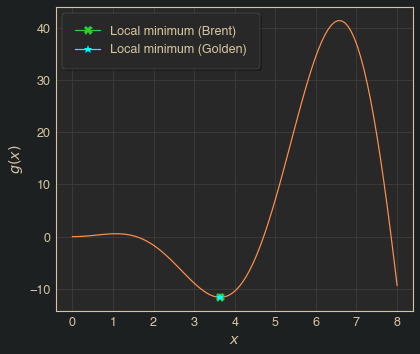

In [2]:
'''
    User-defined function
'''

def g(x):
    return x*x * np.cos(x)

brent  = minimize_scalar(g, bracket=(0,4,8), method='brent')
golden = minimize_scalar(g, bracket=(0,4,8), method='golden')

'''
    Get the location of the minimum and 
    the number of function calls from both methods
'''
min_brent   = brent.x
nfev_brent  = brent.nfev
min_golden  = golden.x
nfev_golden = golden.nfev

print(
      f'Brent\'s Method took {nfev_brent} function evaluations to', 
      f'find the minimum, located at x = {min_brent}.'
    )
print(f'The Golden Method took {nfev_golden} function evaluations',
      f'to find the minimum, located at x = {min_golden}.')

'''
    Plot the function and location of the minimum
'''
xgrid = np.linspace(0,8,100)
plt.plot(xgrid, g(xgrid), 'y-')
plt.plot(brent.x, brent.fun, marker="X", color='limegreen', 
         markersize=9, label='Local minimum (Brent)')
plt.plot(golden.x, golden.fun, marker="*", color='cyan', 
         markersize=9, label='Local minimum (Golden)')
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.legend(fancybox=True, framealpha=1, borderpad=1, shadow=True)
plt.show()
# plt.savefig('Figures/g_func.pdf')
plt.close()

##   <font color='green'> <em> <b>  Problem 2 </b> </em> </font> 

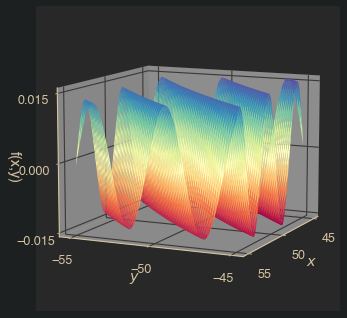

In [3]:
'''
    Function f from Problem 2
'''

def f(x,y):
    rho   = np.sqrt(x*x + y*y)
    theta = np.arctan(y/x)  
    num   = rho*rho * np.sin(2.*(theta - rho)) 
    den   = 1. + rho ** 3
    return num/den

'''
    Plot f in the square x \in [45,55], y \in [-55, -45]
'''
x    = np.linspace(45,55,1000)
y    = np.linspace(-55,-45,1000)
X,Y  = np.meshgrid(x, y)
Z    = f(X, Y)
ax   = plt.axes(projection='3d')

ax.view_init(10, 25)
ax.plot_surface(X, Y, Z, cmap='Spectral')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'f(x,y)')
ax.set_xticks([45, 50, 55])
ax.set_yticks([-55, - 50, -45])
ax.set_zticks([-.015, 0., .015])
plt.show()
plt.close()

In [ ]:
from sympy import *

In [4]:
''' Write the function in symbolic form '''

var(('x', 'y', 'rho', 'theta'))
f_symb = rho**2 * sin(2*(theta - rho)) / (1 + rho ** 3)

''' Get its gradient '''
g = f_symb.subs({rho : sqrt(x**2 + y**2), theta : atan(y/x)})

sym_grad_f_x = diff(g,x)
sym_grad_f_y = diff(g,y)
sym_grad_f   = Matrix([
                    [sym_grad_f_x], 
                    [sym_grad_f_y]
                  ])

''' Convert from symbolic to Python expression'''
grad_f =lambdify((x,y), sym_grad_f)

In [ ]:
from CG import *
from powell import *

In [7]:
'''
    Find the minimum using both Powell's Method and CG
'''
# starting guess
p0 = np.array((50., -50.))

min_powell   = powell(p0, f)[0]
f_min_powell = powell(p0, f)[1]
it_powell    = powell(p0, f)[2]

min_CG   = conj_grad(p0, f, grad_f)[0]
f_min_CG = conj_grad(p0, f, grad_f)[1]
it_CG    = conj_grad(p0, f, grad_f)[2]


print('Using Powell\'s method, '
      f'the minimum f = {f_min_powell} was found at p = {min_powell}',
      f'after {it_powell} iterations.')


print('\nUsing the Conjugate Gradient method, '
      f'the minimum f = {f_min_CG} was found at p = {min_CG}',
      f'after {it_CG} iterations.')

Using Powell's method, the minimum f = -0.5291336839893999 was found at p = [-1.12071341 -0.5756757 ] after 2146 iterations.

Using the Conjugate Gradient method, the minimum f = -0.5291336839893999 was found at p = [-1.12071341 -0.57567567] after 3970 iterations.
